<a href="https://colab.research.google.com/github/mokselb/AD/blob/main/Lab1(knn%2Btree%2Bsvm%2Bforest%2Bada).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [151]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [83]:
df = pd.read_csv("breast-cancer.csv")

Покажемо розмір нашого датасету

In [84]:
df.shape

(569, 32)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

Колонка id нам не потрібна, тому ми її видаляємо

In [86]:
df.drop('id', axis=1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

Решта фіч мають сенс і пов'язані

<Axes: >

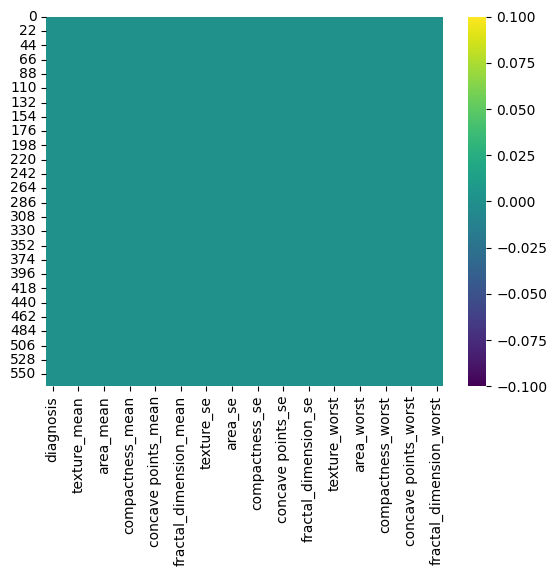

In [87]:
sns.heatmap(df.isnull(), cmap='viridis')

Тут ми можемо побачити, що пропусків немає і всі колонки мають змістовні данні

<Axes: xlabel='diagnosis', ylabel='count'>

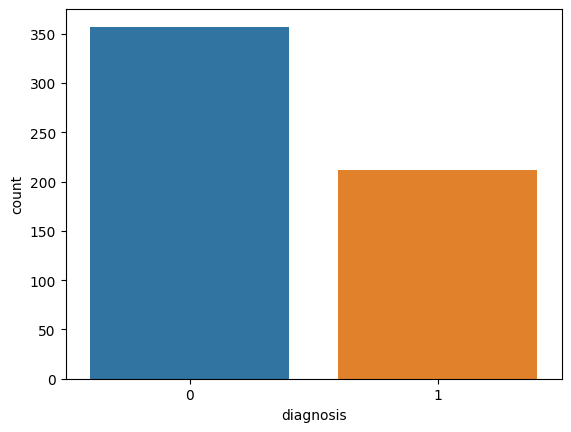

In [88]:
sns.countplot(x='diagnosis',data=df)

Тут ми побачили кількість людей з позитивним та негативним діагнозом

<Axes: xlabel='radius_mean', ylabel='Count'>

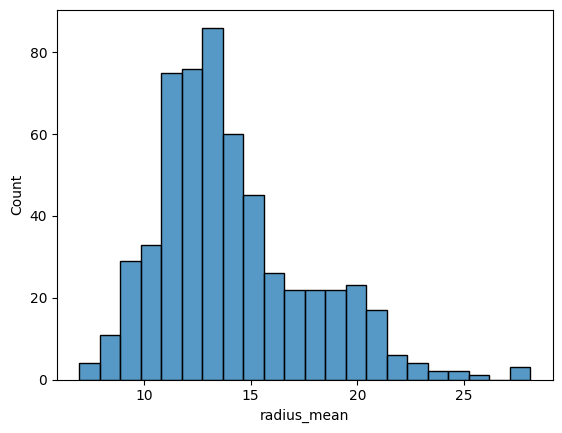

In [89]:
sns.histplot(df['radius_mean'])

<Axes: xlabel='perimeter_mean', ylabel='Count'>

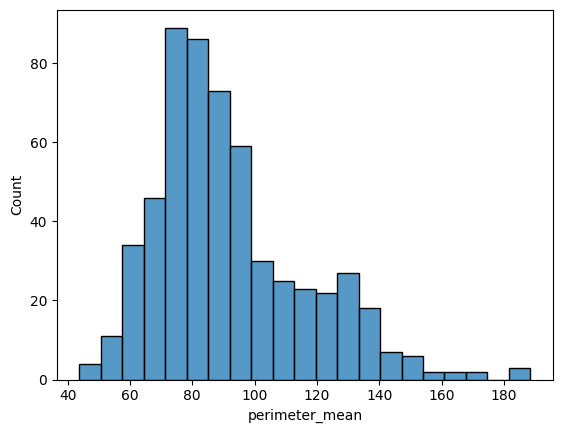

In [90]:
sns.histplot(df['perimeter_mean'])

<Axes: xlabel='radius_worst', ylabel='Count'>

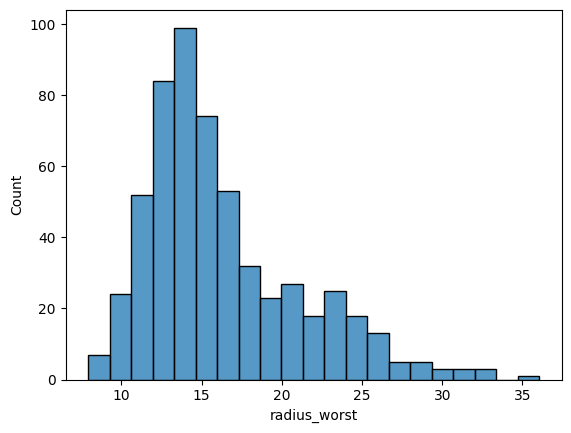

In [91]:
sns.histplot(df['radius_worst'])

<Axes: xlabel='perimeter_worst', ylabel='Count'>

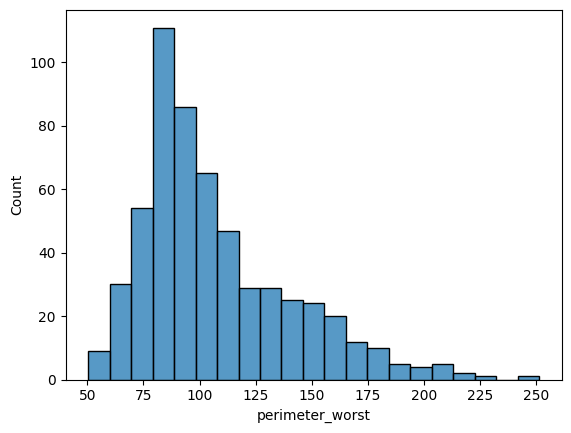

In [92]:
sns.histplot(df['perimeter_worst'])

<Axes: xlabel='symmetry_mean', ylabel='Count'>

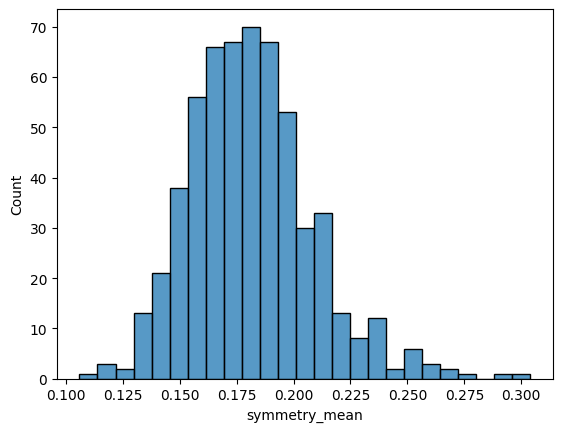

In [93]:
sns.histplot(df['symmetry_mean'])

Це були гістаграми деяких фіч

Таргетом оберемо колонку діагноз

In [94]:
df.rename(columns={'diagnosis' : 'target'}, inplace = True)

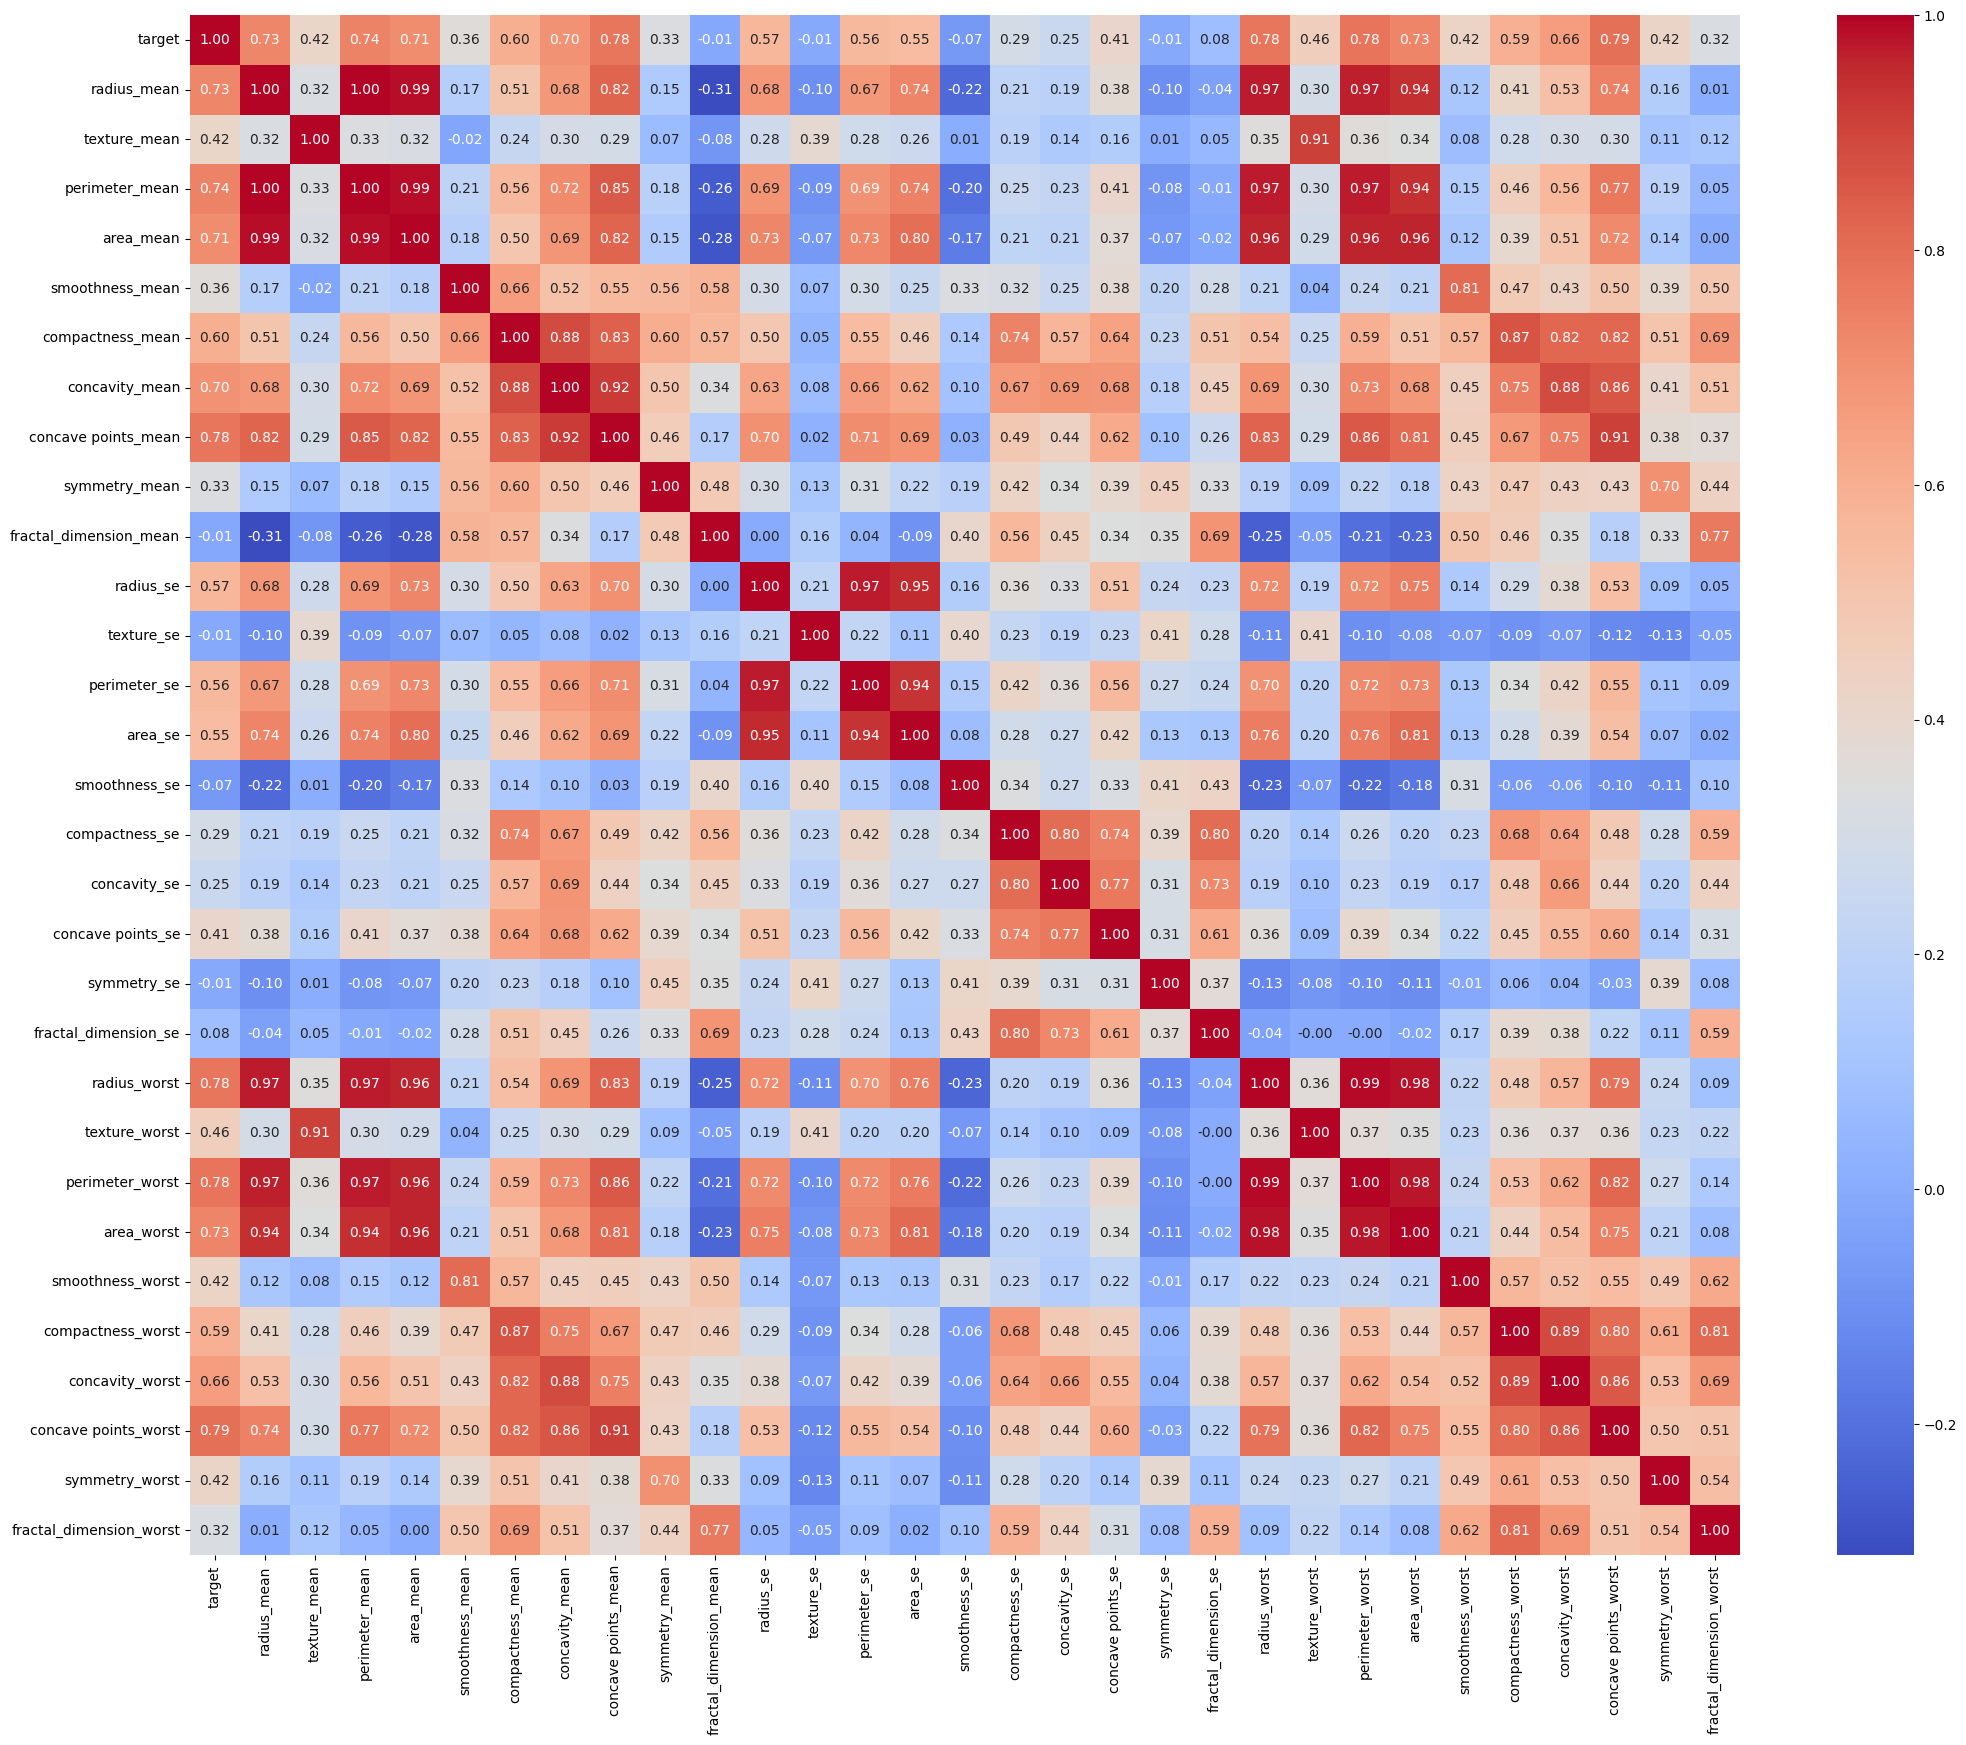

In [95]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(25, 20))
sns.heatmap(corr,  cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

На цій мапі можемо побачити кореляцію фіч між собою та з таргетом

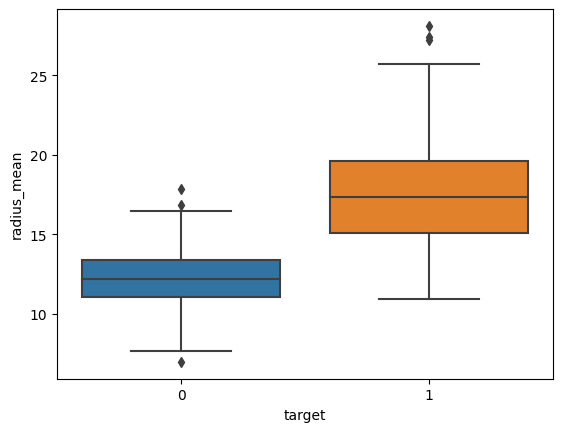

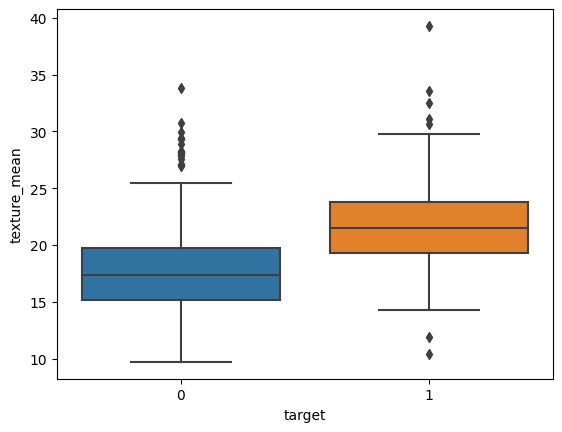

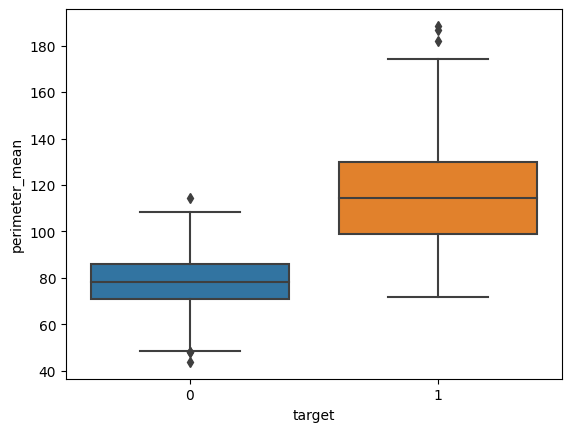

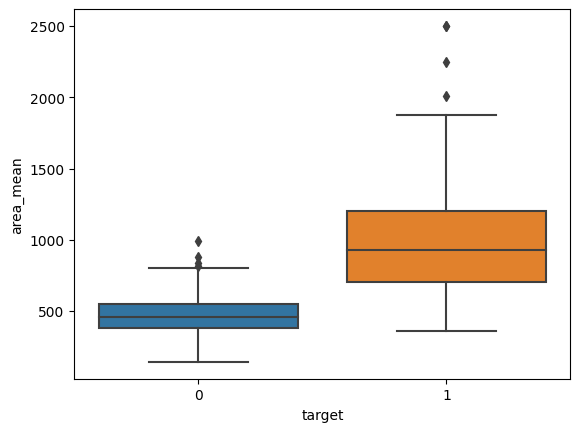

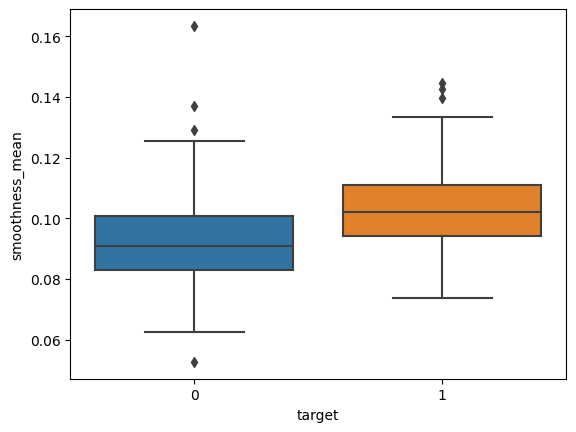

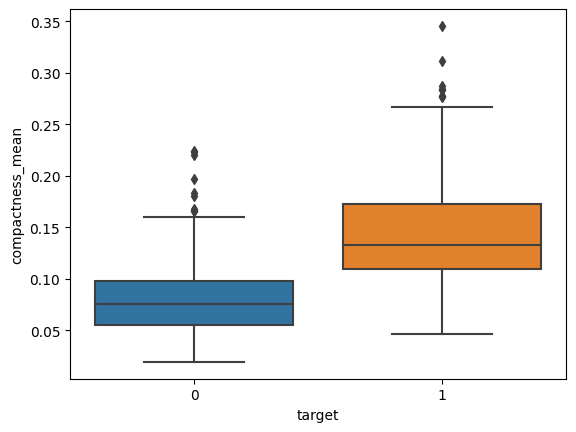

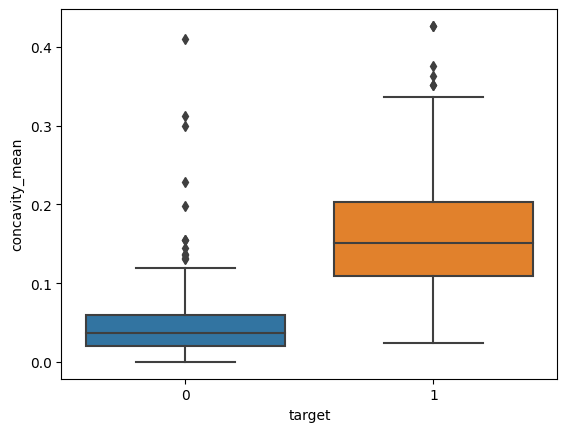

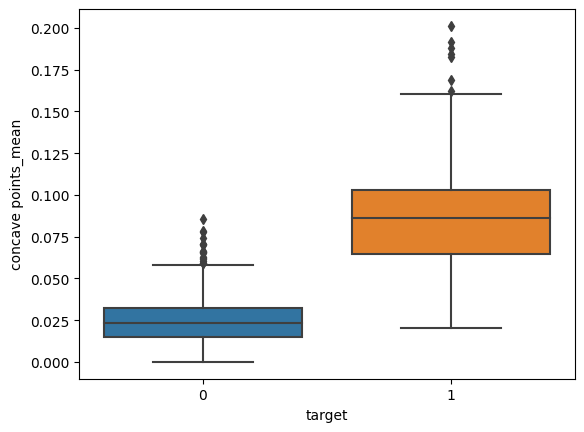

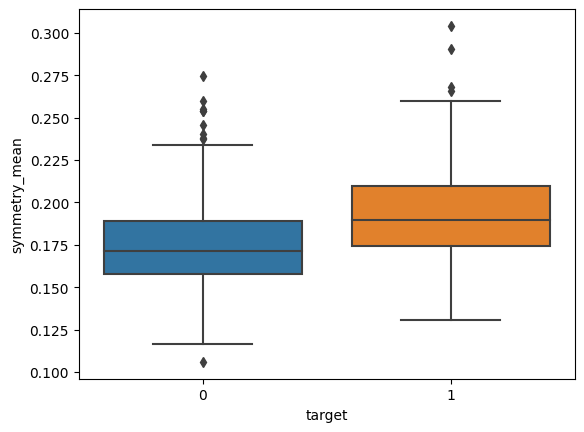

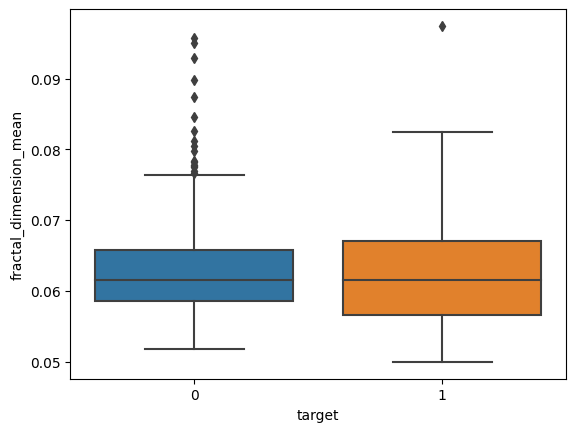

In [96]:
for i in range(1,11):
    figure = plt.figure()
    ax = sns.boxplot(x='target', y=df.columns[i], data=df)

Тут продемонстрували boxplot-и деяких ознак відносно цільової змінної

In [97]:
ndf=(df-df.min())/(df.max()-df.min())
ndf.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1.0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1.0,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1.0,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1.0,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1.0,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


Тут ми зробили min-max скейлінг для нормалізації данних

Розпочнемо з алгоритму **kNN**, раніше ми вже побачили, що дані готові для роботи і відразу перейдемо до трейн тест спліту

In [98]:
X = ndf.drop(['target'], axis = 1)
y = ndf['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

Не будемо вгадувати параметр К та відразу перейдемо до розумного його підбору використовуючи відношення частоти помилок до власне парметра

In [99]:
error_rate = []

for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

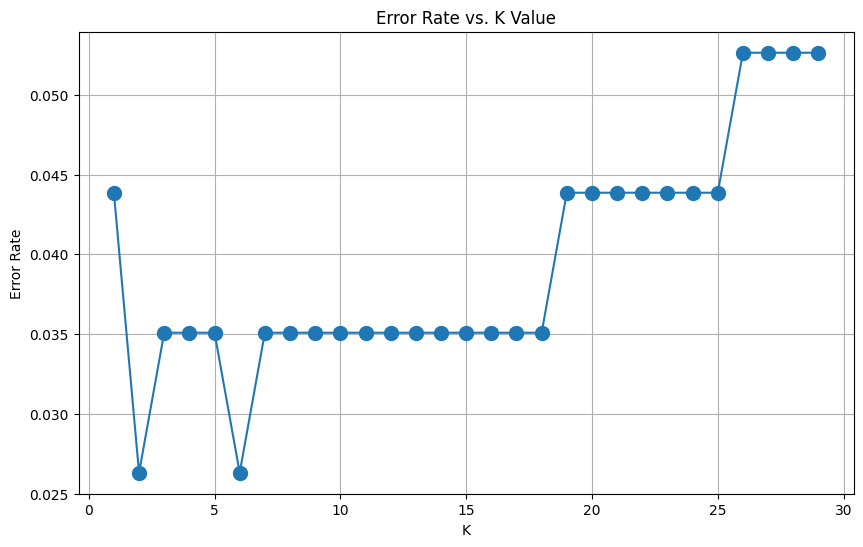

In [100]:
plt.figure(figsize=(10,6))
plt.plot(range(1,30), error_rate, marker='o', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.grid()

Можемо звернути увагу що при параметрах 2 та 6 найменше помилок, отже використаємо їх

In [101]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[65  0]
 [ 3 46]]

              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98        65
         1.0       1.00      0.94      0.97        49

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [115]:
knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print(confusion_matrix(y_test,pred))
print()
print(classification_report(y_test,pred))

[[64  1]
 [ 2 47]]

              precision    recall  f1-score   support

         0.0       0.97      0.98      0.98        65
         1.0       0.98      0.96      0.97        49

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



Тепер перейдемо до метода **Дерево ухвалення рішень**

Для початку спробуємо **gini**

In [104]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.85      0.88        65
         1.0       0.81      0.90      0.85        49

    accuracy                           0.87       114
   macro avg       0.87      0.87      0.87       114
weighted avg       0.87      0.87      0.87       114



In [106]:
print(confusion_matrix(y_test, y_pred))

[[55 10]
 [ 5 44]]


Тепер спробуємо **entropy**

In [107]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [108]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        65
         1.0       0.92      0.92      0.92        49

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [109]:
print(confusion_matrix(y_test, y_pred))

[[61  4]
 [ 4 45]]


Як бачимо, на цей раз точність набагато краща, тепер спробуємо останній варіант **log_loss**

In [110]:
tree = DecisionTreeClassifier(criterion='log_loss')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [111]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.94      0.94      0.94        65
         1.0       0.92      0.92      0.92        49

    accuracy                           0.93       114
   macro avg       0.93      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [112]:
print(confusion_matrix(y_test, y_pred))

[[61  4]
 [ 4 45]]


Обидва останні варіанти показали однаковий результат кількості помилок та точності, а найголовніше, кращий результат ніж **gini**

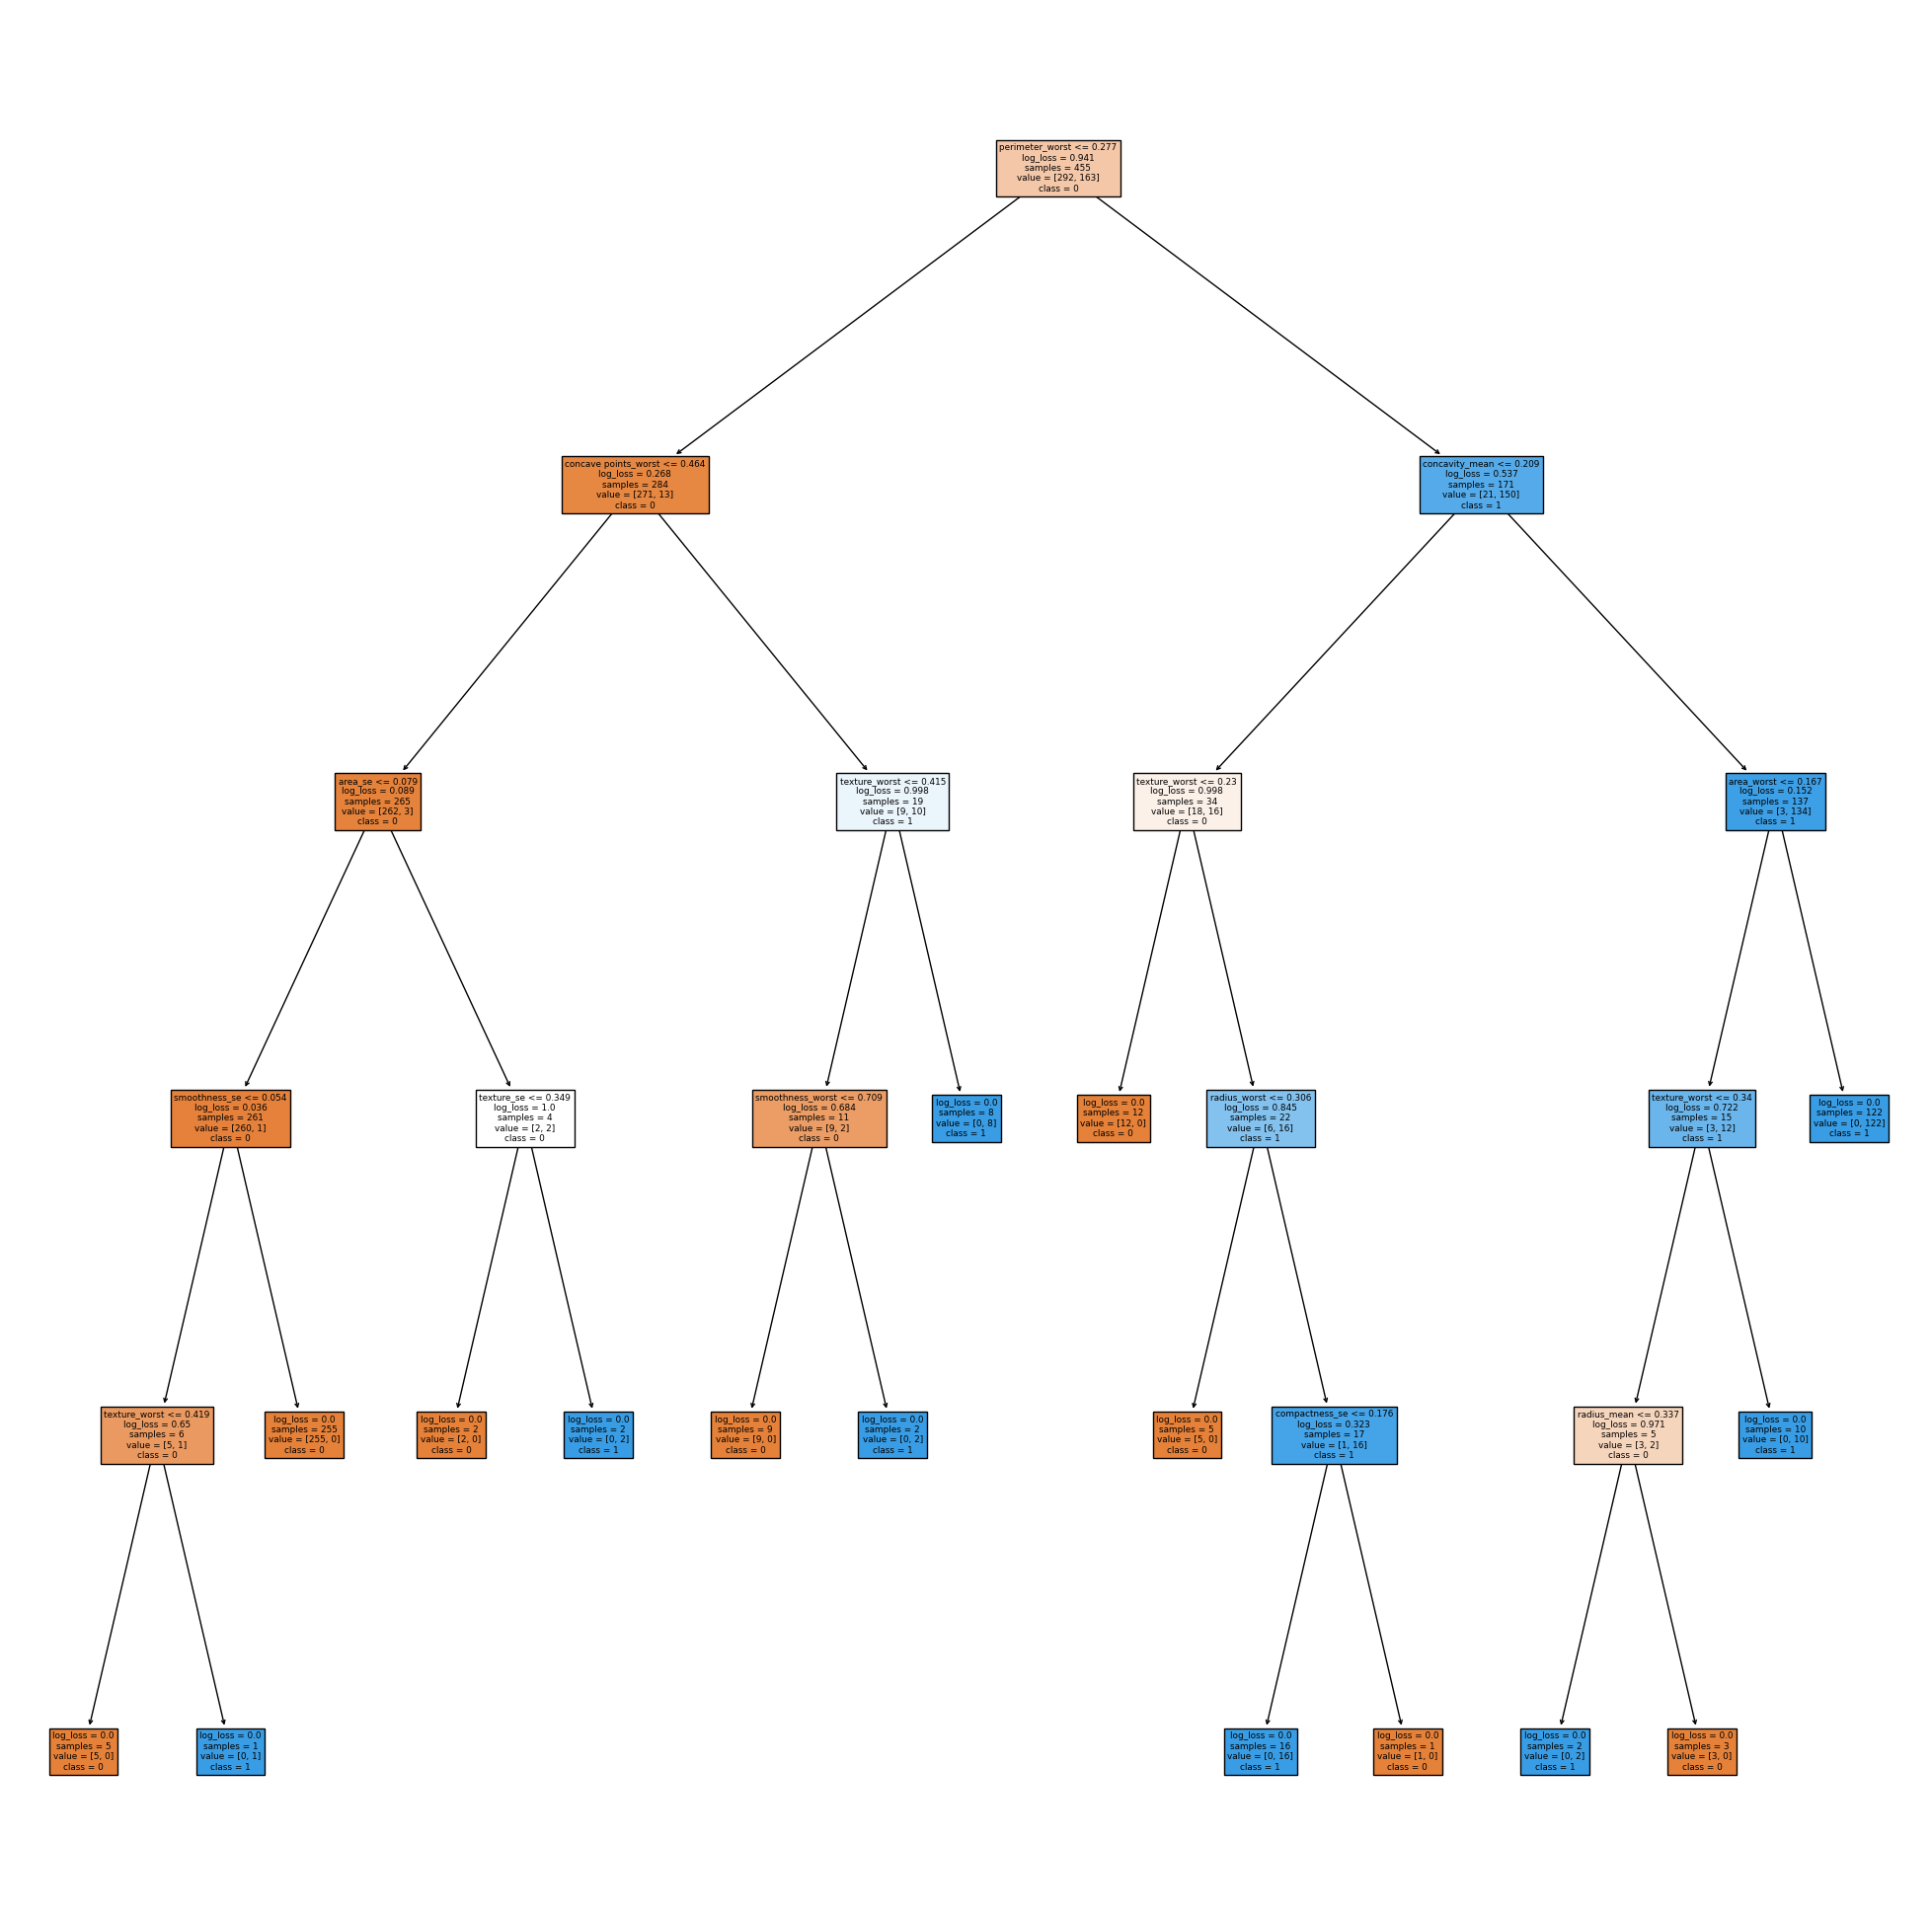

In [114]:
plt.figure(figsize = (25, 25))
tempdf = ndf.drop(['target'], axis = 1)
column_names = list(tempdf.columns)
plot_tree(tree, feature_names = column_names,
          class_names = ['0', '1'], filled = True)
plt.show()

Перейдемо до метода **SVM**.
Спробуємо випадкові параметри для початку

In [136]:
svm = SVC(C=1000, gamma = 0.0001, kernel = 'rbf')
svm.fit(X_train,y_train)
y_pred = svm.predict(X_test)

In [137]:
print(confusion_matrix(y_test, y_pred))

[[65  0]
 [ 5 44]]


In [138]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      1.00      0.96        65
         1.0       1.00      0.90      0.95        49

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



Хоч і дивно, але ми отримали досить хороший результат відразу, все ж для того щоб точно дізнатися які параметрипідійдуть краще всього використаємо підбір параметрів

In [143]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True)
grid.fit(X_train,y_train)
grid_predictions = grid.predict(X_test)
print(confusion_matrix(y_test,grid_predictions))

[[63  2]
 [ 2 47]]


In [144]:
grid.best_estimator_

SVC(C=1, gamma=1)

In [145]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

         0.0       0.97      0.97      0.97        65
         1.0       0.96      0.96      0.96        49

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



Отже найкраща точність при параметрах С=1 та гамма = 1, схоже датасет чудово підходить для SVM

Перейдемо до **random forest**

Будемо використовувати параметр log_loss, так як він показав кращі результати ніж gini для звичайного дерева

In [148]:
rfc = RandomForestClassifier(criterion='log_loss')
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        65
         1.0       0.94      0.96      0.95        49

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [150]:
print(confusion_matrix(y_test, y_pred))

[[62  3]
 [ 2 47]]


Ми отримали чудову точність

Тепер перейдемо до **AdaBoost**

Щоб наглядно використати AdaBoost, візьмемо наше дерево з параметром gini

In [152]:
tree = DecisionTreeClassifier(criterion='gini')
tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)

In [153]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.88      0.90        65
         1.0       0.85      0.92      0.88        49

    accuracy                           0.89       114
   macro avg       0.89      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



In [154]:
print(confusion_matrix(y_test, y_pred))

[[57  8]
 [ 4 45]]


Тепер використаємо AdaBoost

In [162]:
ada = AdaBoostClassifier(estimator = tree, n_estimators = 500, learning_rate = 0.5, random_state = 67)
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

In [163]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.88      0.91        65
         1.0       0.85      0.94      0.89        49

    accuracy                           0.90       114
   macro avg       0.90      0.91      0.90       114
weighted avg       0.91      0.90      0.90       114



In [164]:
print(confusion_matrix(y_test, y_pred))

[[57  8]
 [ 3 46]]


Як можемо побачити, адабуст дав кращу точність, хоч лише і на 1 помилку, але все ж краще